In [ ]:
%pip install opencv-python-headless


AssemblyBot: Ecco le istruzioni per l'assemblaggio finale del prodotto 'Treno Arancio':
Fase 5: Assemblaggio Finale dei Moduli

1.Collegamento della Coda al Centro: Fissare il modulo Coda al modulo Centro posizionando i fori del pezzo Verde della Coda su uno dei due agganci liberi del pezzo Celeste del Centro.
2. Collegamento della Base Anteriore: Fissare i fori del pezzo Blu Quadrato della Base Anteriore sugli agganci liberi del pezzo Celeste del modulo precedentemente assemblato.
3.Collegamento del Tetto Anteriore: Fissare il Tetto Anteriore alla Base composta dai due pezzi Rossi Tondeggianti sul Blu Quadrato del modulo precedentemente assemblato.

Hai completato il processo di assemblaggio! Ora devi fare il controllo qualità.


Text(value='', description='Domanda:', placeholder='Inserisci la tua domanda qui...')

Button(description='Indietro', style=ButtonStyle())

Button(description='Avanti', style=ButtonStyle())

Dropdown(description='Seleziona Prodotto:', index=1, options=(('', 'Seleziona un prodotto'), ('Treno Arancio',…

Button(description='Controllo qualità', style=ButtonStyle())

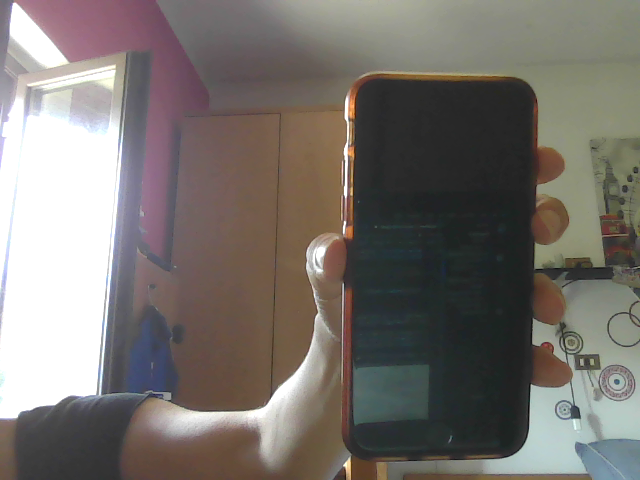

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
L'oggetto è stato Assemblato correttamente.


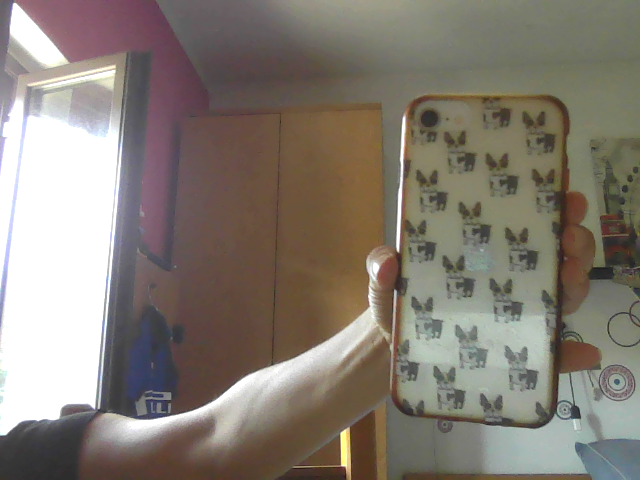

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
L'oggetto è stato Assemblato male.


In [ ]:
import ipywidgets as widgets  # Importa la libreria ipywidgets per creare widget interattivi
from IPython.display import display, clear_output  # Importa funzioni per visualizzare e aggiornare l'output in un notebook
import spacy  # Importa spaCy per l'elaborazione del linguaggio naturale (NLP)
import cv2  # Importa OpenCV per la gestione della webcam e l'elaborazione delle immagini
from PIL import Image  # Importa PIL per gestire le immagini
import numpy as np  # Importa NumPy per la manipolazione degli array
from tensorflow.keras.models import load_model  # Importa Keras per caricare il modello di deep learning
from tensorflow.keras.preprocessing import image  # Importa funzioni di preprocessing delle immagini in Keras

# Carica il modello NLP di spaCy
nlp = spacy.load("en_core_web_sm")  # Carica il modello pre-addestrato di spaCy per analizzare il linguaggio naturale

# Carica il modello di classificazione delle immagini
model = load_model('model_assemblaggio.h5')  # Carica il modello di deep learning per la classificazione delle immagini

# Funzione per preparare l'immagine per la predizione
def prepara_immagine(img_path):
    img = image.load_img(img_path, target_size=(150, 150))  # Carica l'immagine e la ridimensiona a 150x150 pixel
    img_array = image.img_to_array(img)  # Converte l'immagine in un array NumPy
    img_array = np.expand_dims(img_array, axis=0)  
    img_array /= 255.0  # Normalizza i valori dei pixel tra 0 e 1
    return img_array  

# Funzione per predire se l'assemblaggio è corretto o meno

# La funzione model.predict(img_array) utilizza un modello di deep learning per fare una predizione sull'immagine preparata (img_array).
# Il modello è stato addestrato per riconoscere due situazioni: Assemblato male e Assemblato correttamente.
# E' stato addestrato su set di immagini (raccolte in una cartella) suddivise in due sottocartelle che rappresentano le due classi:
# Treno arancio assemblato correttamente con immagini di assemblaggi corretti (chiaramente da sostutire con quelle vere io ho scattato foto al cell)
# Treno arancio assemblato male con immagini di assemblaggi errati.
# osservando le immagini riconosce questi due stati.

# Il modello restituisce un array con probabilità per le diverse classi.
# La soglia di 0.5 è usata per decidere è Assemblato male o Assemblato correttamente.
# Se il valore previsto dal modello è sopra 0.5, significa che è "Assemblato male".
# Se il valore è 0.5 o sotto, significa che è Assemblato correttamente.
#Questa funzione viene poi utilizzata nel momento dello scatto della foto dopo aver assemblato il prodotto e compara le due immagini.

def predici_assemblaggio(img_path):
    img_array = prepara_immagine(img_path)  # Prepara l'immagine
    predizione = model.predict(img_array)  # Effettua la predizione utilizzando il modello caricato
    return "Assemblato male" if predizione[0] > 0.5 else "Assemblato correttamente"  # Ritorna il risultato della predizione

# Funzione che carica le istruzioni di assemblaggio e le suddivide in sezioni
def carica_istruzioni(file_path):
    try:
        with open(file_path, 'r', encoding='utf-8') as file:  # Apre il file contenente le istruzioni di assemblaggio
            contenuto = file.read()  # Legge il contenuto del file
        chunks = contenuto.split('---')  # Suddivide il contenuto in sezioni usando '---' come delimitatore
        return chunks  # Restituisce le sezioni di istruzioni
    except FileNotFoundError:
        return ["Errore: Il file non è stato trovato."]  # Restituisce un messaggio di errore se il file non è trovato

# Funzione per analizzare l'input dell'utente e determinare l'intento
def analizza_domanda(domanda):
    doc = nlp(domanda.lower())  # Converte la domanda in minuscolo e la analizza con spaCy
    if any(token.lemma_ in ["coda", "back"] for token in doc):  # Controlla se la domanda riguarda la "coda"
        return 1
    elif any(token.lemma_ in ["centro", "center"] for token in doc):  # Controlla se la domanda riguarda il "centro"
        return 2
    elif any(token.lemma_ in ["tetto", "roof"] for token in doc):  # Controlla se la domanda riguarda il "tetto"
        return 3
    elif any(token.lemma_ in ["base", "bottom"] for token in doc):  # Controlla se la domanda riguarda la "base"
        return 4
    elif any(token.lemma_ in ["finale", "complete"] for token in doc):  # Controlla se la domanda riguarda la fase "finale"
        return 5
    return 0  # Ritorna 0 se nessun intento corrisponde

# Funzione che trova la risposta basata sulla fase corrente del processo di assemblaggio
def trova_risposta(fase_corrente, istruzioni):
    prodotto = product_selector.value  # Ottiene il prodotto selezionato dall'utente
    if fase_corrente == 1:
        return f"Ecco i componenti e i passaggi necessari per assemblare la CODA del prodotto '{prodotto}':\n" + istruzioni[2].strip()
    elif fase_corrente == 2:
        return f"Ecco i componenti e i passaggi necessari per assemblare il CENTRO del prodotto '{prodotto}':\n" + istruzioni[3].strip()
    elif fase_corrente == 3:
        return f"Ecco i componenti e i passaggi necessari per assemblare il TETTO ANTERIORE del prodotto '{prodotto}':\n" + istruzioni[4].strip()
    elif fase_corrente == 4:
        return f"Ecco i componenti e i passaggi necessari per assemblare la BASE ANTERIORE del prodotto '{prodotto}':\n" + istruzioni[5].strip()
    elif fase_corrente == 5:
        return f"Ecco le istruzioni per l'assemblaggio finale del prodotto '{prodotto}':\n" + istruzioni[6].strip() + "\n\nHai completato il processo di assemblaggio! Ora devi fare il controllo qualità."
    else:
        return "Mi dispiace, non ho una risposta per questa domanda. Prova a chiedere informazioni sui moduli di assemblaggio."

# Funzione per gestire l'input testuale dell'utente
def on_submit(change):
    global fase_corrente
    clear_output()  # Pulisce l'output precedente
    
    domanda = input_widget.value  # Ottiene la domanda inserita dall'utente
    
    fase_corrente = analizza_domanda(domanda)  # Determina la fase dell'assemblaggio in base alla domanda
    
    risposta = trova_risposta(fase_corrente, istruzioni)  # Trova la risposta appropriata
    print(f"AssemblyBot: {risposta}")  # Stampa la risposta
    
    # Resetta il campo di input dopo l'invio
    input_widget.value = ''
    display(input_widget, button_indietro, button_avanti, product_selector, button_scatta_foto)  

# Funzione per avanzare alla fase successiva dell'assemblaggio
def procedi(b):
    global fase_corrente
    clear_output() 
    if fase_corrente < 5:
        fase_corrente += 1  
    risposta = trova_risposta(fase_corrente, istruzioni)  
    print(f"AssemblyBot: {risposta}")  
    display(input_widget, button_indietro, button_avanti, product_selector, button_scatta_foto)  # Ridisplaya i widget


def indietro(b):
    global fase_corrente
    clear_output()  
    if fase_corrente > 0:
        fase_corrente -= 1  
    risposta = trova_risposta(fase_corrente, istruzioni)  
    print(f"AssemblyBot: {risposta}") 
    display(input_widget, button_indietro, button_avanti, product_selector, button_scatta_foto)  

# Funzione per scattare una foto utilizzando la webcam e fare una predizione sul risultato dell'assemblaggio
def scatta_foto(b):
    
    cap = cv2.VideoCapture(0)  
    
    if not cap.isOpened():
        print("Errore: Impossibile accedere alla webcam.")  # Stampa un errore se la webcam non è accessibile
        return
    
    ret, frame = cap.read()  # Legge un frame dalla webcam
    cap.release()  # Rilascia la webcam
    
    if ret:
        # Converte il frame in un'immagine PIL per visualizzazione in Jupyter
        img = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))  # Converte il frame BGR in RGB
        
        # Salva l'immagine catturata
        img_path = "foto_catturata.png"  # Percorso dove verrà salvata l'immagine
        img.save(img_path)  
        
        
        display(img) 
        
        # Predizione dell'immagine
        risultato = predici_assemblaggio(img_path)  # Esegue la predizione utilizzando il modello
        print(f"L'oggetto è stato {risultato}.")  # Stampa il risultato della predizione
    else:
        print("Errore: Impossibile catturare un'immagine.")  

# Funzione per gestire la selezione del file in base al prodotto scelto
def on_product_change(change):
    global fase_corrente, istruzioni
    fase_corrente = 0  
    prodotto_selezionato = change['new']  
    
    if prodotto_selezionato:
        file_path = file_dict.get(prodotto_selezionato, None)  # Ottiene il percorso del file associato al prodotto selezionato
        if file_path:
            istruzioni = carica_istruzioni(file_path)  # Carica le istruzioni dal file selezionato
            clear_output()  # Pulisce l'output
            print(f"Il prodotto '{prodotto_selezionato}' ha i seguenti moduli:\n" + 
                  istruzioni[1].strip() + "\nPremi avanti per seguire il manuale passo passo o scrivi cosa vuoi assemblare.")
        else:
            print("Errore: Il file per il prodotto selezionato non è stato trovato.")  # Stampa un errore se il file non viene trovato
    else:
        print("Per favore, seleziona un prodotto dalla lista.")  # Chiede all'utente di selezionare un prodotto
    
    display(input_widget, button_indietro, button_avanti, product_selector, button_scatta_foto)  

# Dizionario per mappare i prodotti ai file delle istruzioni
file_dict = {
    "Treno Arancio": "C:\\Users\\marid\\OneDrive\\Desktop\\Progetto SF\\TrenoArancio.txt",  # Associa "Treno Arancio" al suo file di istruzioni
    "Treno Viola": "C:\\Users\\marid\\OneDrive\\Desktop\\Progetto SF\\TrenoViola.txt"  # Associa "Treno Viola" al suo file di istruzioni
}

# Selettore del prodotto
product_selector = widgets.Dropdown(
    options=[('', 'Seleziona un prodotto')] + [(k, k) for k in file_dict.keys()],  # Crea un menu a discesa con le opzioni di prodotto
    description='Seleziona Prodotto:',
    disabled=False,
)


product_selector.observe(on_product_change, names='value') 


fase_corrente = 0  
istruzioni = []  
input_widget = widgets.Text(description='Domanda:', placeholder='Inserisci la tua domanda qui...')  # Crea un campo di testo per l'input dell'utente
input_widget.on_submit(on_submit)  

button_avanti = widgets.Button(description="Avanti")  # Crea un pulsante per avanzare nella procedura
button_indietro = widgets.Button(description="Indietro")  # Crea un pulsante per tornare indietro nella procedura
button_scatta_foto = widgets.Button(description="Controllo qualità")  # Crea un pulsante per scattare una foto e controllare la qualità dell'assemblaggio

button_avanti.on_click(procedi)  # Collega la funzione di avanzamento al pulsante "Avanti"
button_indietro.on_click(indietro)  # Collega la funzione di ritorno al pulsante "Indietro"
button_scatta_foto.on_click(scatta_foto)  # Collega la funzione di scatto foto al pulsante "Controllo qualità"

# Mostra il selettore di prodotto inizialmente
print("Ciao, sono il tuo assistente AssemblyBot. Seleziona il prodotto che vuoi assemblare.")  # Messaggio iniziale


display(product_selector)  # Mostra il menu a discesa per selezionare un prodotto
